In [2]:
# Setting up the environment
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd

pd.set_option('display.max_rows', 20)
plt.style.use('seaborn-whitegrid')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 7)

# Importing data
data = pd.read_csv(r'C:\Users\anly3\Downloads\archive\movies.csv')


### Data Cleaning

In [3]:
# Checking for missing values
data.isna().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# Dropping null values
new_data = data.dropna()


In [5]:
# Splitting location and date in data.released
new_released = [x.split('(') for x in new_data.released]


In [6]:
# Seperating new_released elements
released_date = [new_released[x][0] for x in range(len(new_released))]
released_location = [new_released[x][1] for x in range(len(new_released))]

# Adding new columns into the new dataset
new_data['released_location'] = released_location
new_data['released_date'] = released_date


<ipython-input-6-8389327928a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['released_location'] = released_location
<ipython-input-6-8389327928a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['released_date'] = released_date


In [7]:
# Fixing new_data.year since it is different from the year in released_date
released_year = new_data.released_date.str[-5:]
new_data['released_year'] = released_year


<ipython-input-7-49375981aa0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['released_year'] = released_year


In [8]:
# Dropping excess columns in the new dataset
new_data = new_data.drop(['released', 'year'], axis=1)
new_data.columns


Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'released_location', 'released_date', 'released_year'],
      dtype='object')

In [9]:
# Dropping the ')' in new_data.released_location
n = [x.split(')') for x in new_data.released_location]
released_location = [n[x][0] for x in range(len(n))]

# Adding back to the dataset
new_data['released_location'] = released_location


In [10]:
# Replacing 'Not Rated' with 'Unrated' in new_data.rating
new_data.rating = new_data.rating.replace('Not Rated', 'Unrated')
new_data.rating.unique()


array(['R', 'PG', 'G', 'NC-17', 'Approved', 'Unrated', 'PG-13', 'X',
       'TV-MA'], dtype=object)

In [11]:
# Converting column data types
convert_dict = {'votes': 'int64', 'budget': 'int64',
                'gross': 'int64', 'runtime': 'int64'}
new_data = new_data.astype(convert_dict)


### Overview

Text(0.5, 1.0, 'Correlation Between Digit Variables')

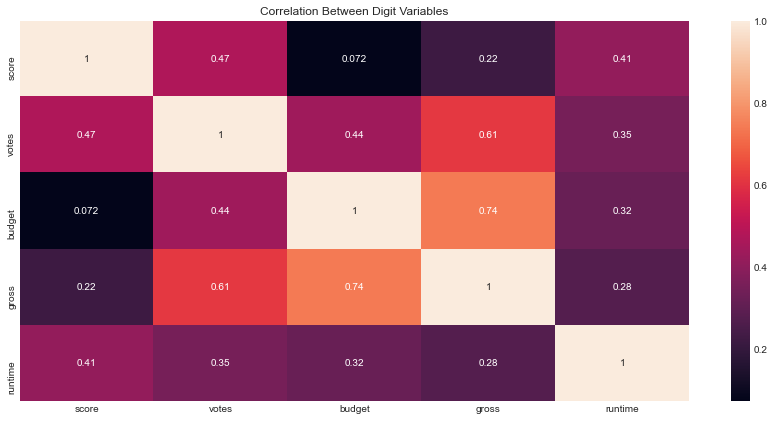

In [13]:
# Examining the correlation between digit variable in the dataset
sns.heatmap(data=new_data.corr(), annot=True)

plt.title('Correlation Between Digit Variables')


In [14]:
# Converting non-digit values into unique digits
coded_data = new_data.copy()
for col in coded_data.columns:
    if coded_data[col].dtype == 'object':
        coded_data[col] = coded_data[col].astype('category').cat.codes
coded_data

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_location,released_date,released_year
5445,386,4,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,47,496,29
7445,388,4,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,47,124,39
3045,4909,4,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,47,502,17
6663,3643,4,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,47,498,35
7244,389,4,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,47,132,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,5,6,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,41,847,35
2434,2969,4,0,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,39,1386,14
3681,1595,7,6,6.8,43000,952,1683,527,6,5000000,2554,466,108,8,1628,21
272,2909,5,9,3.9,2300,261,55,1473,47,800000,2270,582,85,47,1442,2


Text(0.5, 1.0, 'Correlation Matrix')

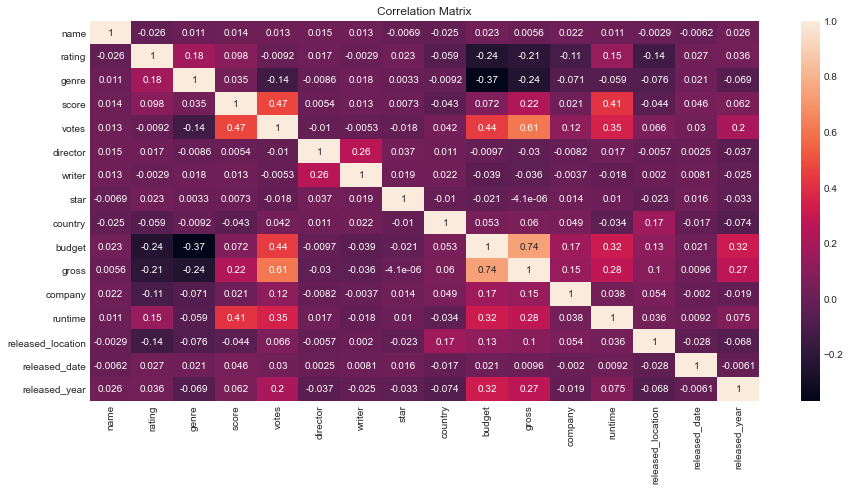

In [15]:
# Correlation matrix for the entire dataset
corr_matrix = coded_data.corr(method='pearson')

# Correlation matrix visualization
sns.heatmap(data=corr_matrix, annot=True)

plt.title('Correlation Matrix')


### Breakdown: Gross Earnings

<AxesSubplot:>

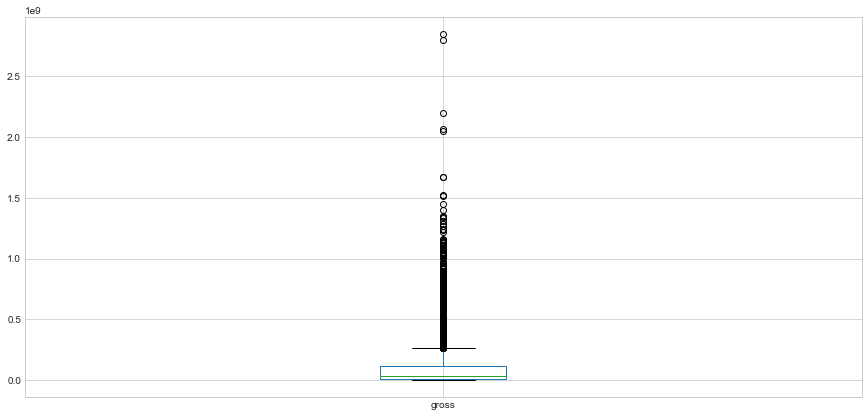

In [33]:
# Ordering data by new_data.gross
new_data = new_data.sort_values(by=['gross', 'name'], ascending=False)

# Checking for outliers in new_data.gross
new_data.boxplot(column='gross')


In [32]:
# Correlation pairs
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[(corr_pairs) != 1]
corr_pairs.sort_values(ascending=False)[:20]

budget         gross            0.740247
gross          budget           0.740247
votes          gross            0.614751
gross          votes            0.614751
score          votes            0.474256
votes          score            0.474256
budget         votes            0.439675
votes          budget           0.439675
score          runtime          0.414068
runtime        score            0.414068
               votes            0.352303
votes          runtime          0.352303
released_year  budget           0.320312
budget         released_year    0.320312
runtime        budget           0.318695
budget         runtime          0.318695
runtime        gross            0.275796
gross          runtime          0.275796
released_year  gross            0.268721
gross          released_year    0.268721
dtype: float64

In [17]:
# Strong correlation pairs
strong_pairs = corr_pairs[abs(corr_pairs) >= 0.5]
print(strong_pairs)

votes   gross     0.614751
budget  gross     0.740247
gross   votes     0.614751
        budget    0.740247
dtype: float64


Text(0.5, 1.0, 'Budget vs Gross Earnings')

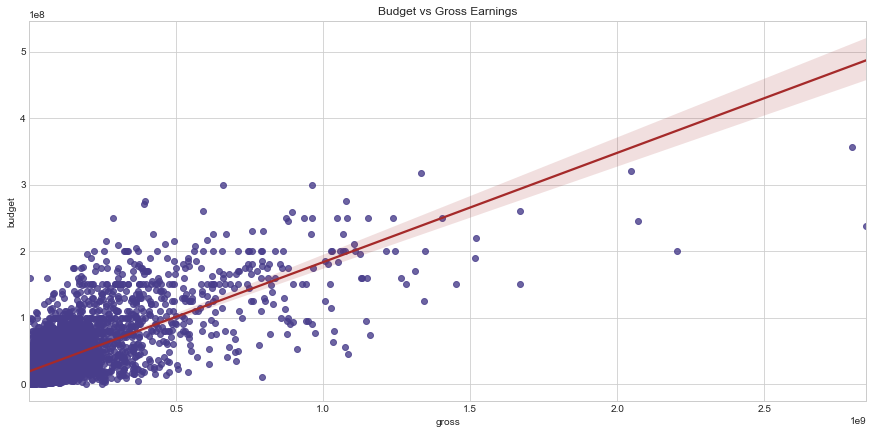

In [18]:
# Correlation between new_data.gross and new_data.budget
gross_budget_viz = sns.regplot(data=new_data, x='gross', y='budget', scatter_kws={
    'color': 'darkslateblue'}, line_kws={'color': 'brown'})

plt.title('Budget vs Gross Earnings')


#### Insights
#### There are positive correlation between gross earnings and votes of 0.740247
#### > This means higher budget are strongly correlated with higher gross earnings

Text(0.5, 1.0, 'Votes vs Gross Earnings')

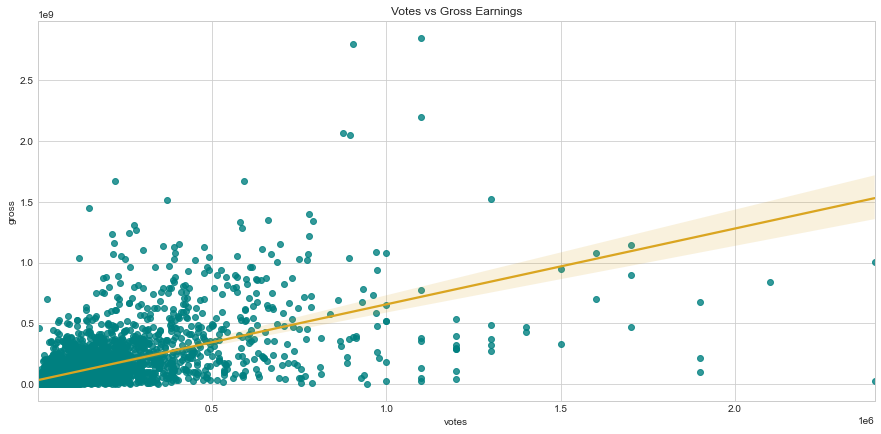

In [19]:
# Correlation between new_data.gross and new_data.votes
gross_votes_viz = sns.regplot(data=new_data, x='votes', y='gross', scatter_kws={
    'color': 'teal'}, line_kws={'color': 'goldenrod'})

plt.title('Votes vs Gross Earnings')


#### Insights
#### There are positive correlation between gross earnings and votes of 0.614751
#### > This means higher number of votes are correlated with higher gross earnings


In [20]:
# Top companies by new_data.gross
gross_comp = new_data.groupby(['company']).gross.sum()
top_comp = gross_comp.sort_values(ascending=False)[:20]
top_comp_df = top_comp.to_frame().reset_index()

Text(0.5, 1.0, 'Top Companies by Gross Earnings')

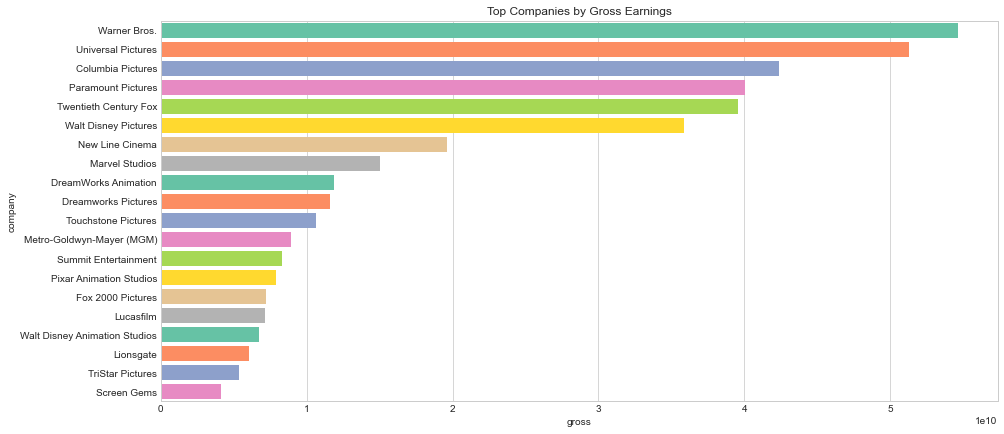

In [21]:
# 'Top Companies by Gross Earnings' visualization
top_comp_viz = sns.barplot(x='gross', y='company', data=top_comp_df, orient='h', saturation=1, palette='Set2')
plt.title('Top Companies by Gross Earnings')

### Breakdown: Net Profit

In [22]:
# Creating new Series net_profit and profit_to_budget 
new_data['net_profit'] = new_data['gross']-new_data['budget']
new_data['profit_to_budget'] = round(new_data['net_profit']/new_data['budget'], 2)

In [23]:
# Top movies by new_data.net_profit
top_movie = new_data.groupby(['name', 'company', 'genre', 'rating', 'budget', 'gross', 'profit_to_budget']
                             ).net_profit.mean().sort_values(ascending=False)[:20]
top_movie_df = top_movie.to_frame().reset_index()



Text(0.5, 1.0, 'Net Profit by Genre')

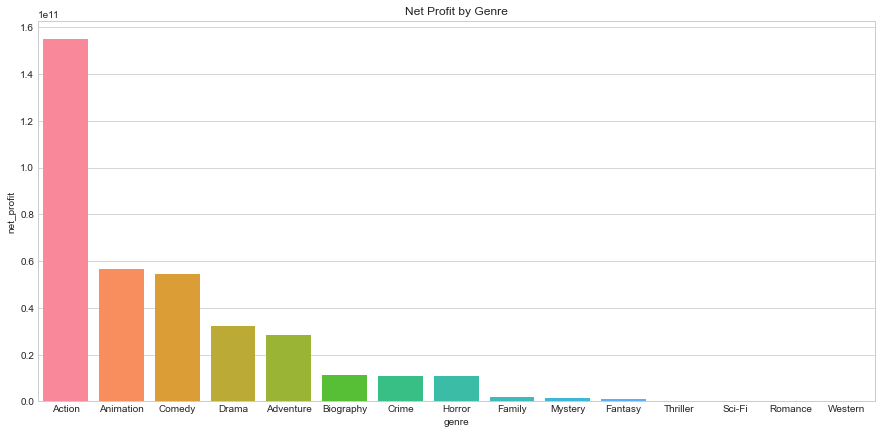

In [24]:
# Top genre by net_profit
top_genre = new_data.groupby(
    'genre').net_profit.sum().sort_values(ascending=False)
top_genre_df = top_genre.to_frame().reset_index()

# Visualization
sns.barplot(data=top_genre_df, x='genre', y='net_profit', saturation=1)
plt.title('Net Profit by Genre')


#### Insights
#### The highest profit in movies belong in the action genre

Text(0.5, 1.0, 'Net Profit by Ratings')

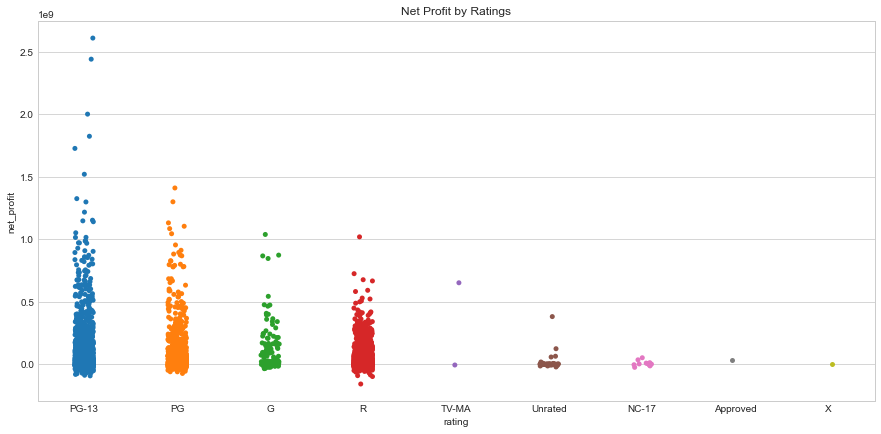

In [25]:
# Net profit by ratings 
gross_ratings_viz = sns.stripplot(data=new_data, x='rating', y='net_profit')

plt.title('Net Profit by Ratings')

#### Insights
#### The highest grossing movies are rated PG-13 and PG

### Breakdown: Profit-to-Budget Ratio

In [27]:
# Top movies with profit-to-budget ratio
profitable = new_data.groupby(['name', 'company', 'genre', 'rating', 'budget', 'gross', 'net_profit']
                             ).profit_to_budget.mean().sort_values(ascending=False)

profitable_df = profitable.to_frame().reset_index()
profitable_df.head()

,name,company,genre,rating,budget,gross,net_profit,profit_to_budget
0,Paranormal Activity,Solana Films,Horror,R,15000,193355800,193340800,12889.39
1,The Blair Witch Project,Haxan Films,Horror,R,60000,248639099,248579099,4142.98
2,The Gallows,New Line Cinema,Horror,R,100000,42964410,42864410,428.64
3,El Mariachi,Columbia Pictures,Action,R,7000,2040920,2033920,290.56
4,Once,Bórd Scannán na hÉireann,Drama,R,150000,20936722,20786722,138.58
...,...,...,...,...,...,...,...,...
5416,Hell's Kitchen,HK Film Corporation,Crime,R,6000000,11710,-5988290,-1.00
5417,Best Laid Plans,Dogstar Films,Crime,R,7000000,27816,-6972184,-1.00
5418,About Cherry,Enderby Entertainment,Drama,R,2500000,8315,-2491685,-1.00
5419,Tanner Hall,Two Prong Lesson,Drama,R,3000000,5073,-2994927,-1.00


In [28]:
# Dropping the outliers
profitable_df = profitable_df.drop([0,1], axis=0)

In [1]:
# Highest profit-to-budget ratio in movies by genre
profitable_genre = profitable_df.groupby(['genre']).profit_to_budget.mean().sort_values(ascending=False)

profitable_genre_df = profitable_genre.to_frame().reset_index()

NameError: name 'profitable_df' is not defined

In [2]:
# Highest profit-to-budget ratio in movies by genre and rating combination
profitable_combination = profitable_df.groupby(['genre', 'rating']).profit_to_budget.mean().sort_values(ascending=False)

profitable_combination_df = profitable_combination.to_frame().reset_index()
profitable_combination_df[:20]

NameError: name 'profitable_df' is not defined

### Insights
#### Movies with highest profit to budget ratio are PG-rated family movies